In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/quantities-prices.csv')
df

,price,quantities
0,3.000000,541.484647
1,3.077077,552.061394
2,3.154154,565.985625
3,3.231231,504.365970
4,3.308308,534.922289
...,...,...
995,79.691692,307.224007
996,79.768769,310.711906
997,79.845846,308.866555
998,79.922923,294.483613


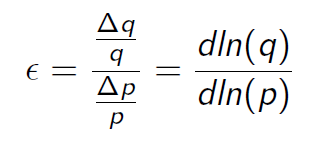

<Axes: xlabel='price', ylabel='quantities'>

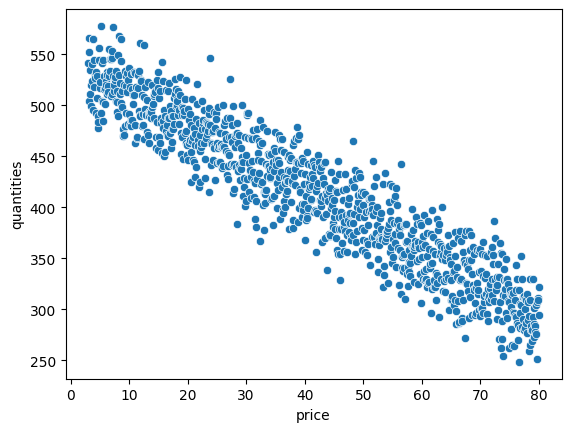

In [ ]:
sns.scatterplot(data=df, x='price', y='quantities')

In [ ]:
df['price_log'] = np.log(df['price']) # conversion a logaritmo para trabajar con porcentajes
df['quantities_log'] = np.log(df['quantities'])
df

,price,quantities,price_log,quantities_log
0,3.000000,541.484647,1.098612,6.294315
1,3.077077,552.061394,1.123980,6.313659
2,3.154154,565.985625,1.148720,6.338569
3,3.231231,504.365970,1.172863,6.223302
4,3.308308,534.922289,1.196437,6.282121
...,...,...,...,...
995,79.691692,307.224007,4.378165,5.727577
996,79.768769,310.711906,4.379132,5.738866
997,79.845846,308.866555,4.380098,5.732909
998,79.922923,294.483613,4.381063,5.685223


$$ y = B0 + B1x$$

$$ ln(y) = Bo + B1*ln(x)$$

In [ ]:
X = sm.add_constant(df['price_log'], prepend=False)
model = sm.OLS(df['quantities_log'],X ).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:         quantities_log   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2604.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          2.17e-280
Time:                        23:06:47   Log-Likelihood:                 918.78
No. Observations:                1000   AIC:                            -1834.
Df Residuals:                     998   BIC:                            -1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price_log     -0.2072      0.004    -51.027      0.0

*Endogenidad: Variables precio y cantidades son dependientes! (Se asume que el metodo de OLS da bien para efectos del ejercicio)

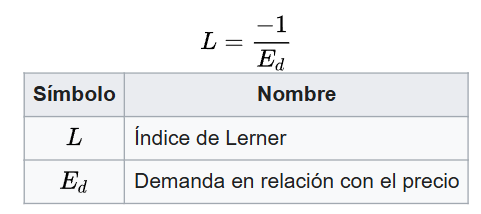

In [ ]:
log_p = (df.loc[901, 'price'] - df.loc[900, 'price']) /df.loc[900, 'price']
log_q = (df.loc[901, 'quantities'] - df.loc[900, 'quantities']) /df.loc[900, 'quantities']

log_q/log_p

62.83982135089455

In [ ]:
df.loc[901, 'quantities'], df.loc[900, 'quantities']

(328.83645447205674, 308.2087743140444)

In [ ]:
df.loc[901, 'price'], df.loc[900, 'price']

(72.44644644644644, 72.36936936936937)

In [ ]:
df.loc[601, 'quantities'], df.loc[600, 'quantities']

(391.0261561732037, 433.6975425238716)

In [ ]:
df.loc[601, 'price'], df.loc[600, 'price']

(49.32332332332332, 49.24624624624624)

-1.89701648066999
-1.4269868861207449